# Сравнение моделей на данных MNIST

In [21]:
import tensorflow as tf
import numpy as np
import sklearn
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import ensemble
from sklearn.neural_network import MLPClassifier

In [3]:
# скачиваем данные
(x_train, y_train), (x_val, y_val) = tf.keras.datasets.mnist.load_data()

In [4]:
# что за данные
print(x_train.shape)
print(x_val.shape)
print (y_train[:10])
print (y_val[:10])

(60000, 28, 28)
(10000, 28, 28)
[5 0 4 1 9 2 1 3 1 4]
[7 2 1 0 4 1 4 9 5 9]


Пример кусочка картинки (пиксели со значениями от 0 до 255):


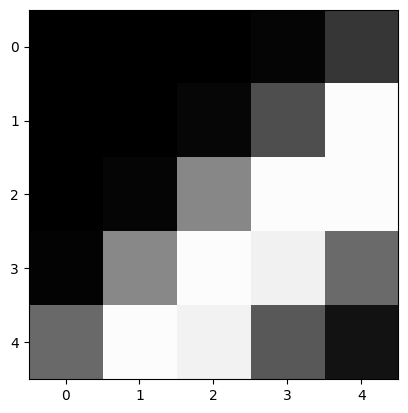

Пример картинки:


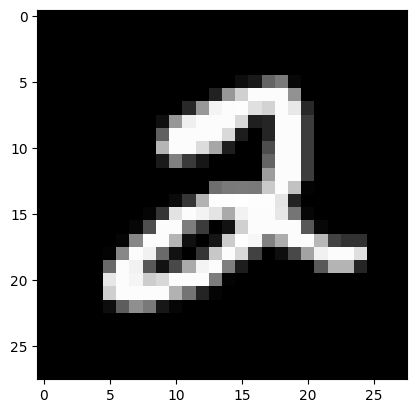

y_train [shape (60000,)] 10 примеров:
 [5 0 4 1 9 2 1 3 1 4]


In [5]:
# нарисуем картинку
x_train_image = np.tile(x_train[5, :, :].reshape((28, 28))[:, :, np.newaxis], (1, 1, 3))
print("Пример кусочка картинки (пиксели со значениями от 0 до 255):")
plt.imshow(x_train_image[15:20, 5:10], cmap="Greys")
plt.show()
print("Пример картинки:")
plt.imshow(x_train_image, cmap="Greys")
plt.show()
print("y_train [shape %s] 10 примеров:\n" % (str(y_train.shape)), y_train[:10])

# Линейная модель

Линейная модель не умеет работать с двумерным входом, поэтому мы *вытянем* картинку 28x28 в вектор длины 28*28=784

In [6]:
x_train_flat = x_train.reshape(-1, 28*28).astype(float)
print(x_train_flat.shape)

x_val_flat = x_val.reshape(-1, 28*28).astype(float)
print(x_val_flat.shape)

(60000, 784)
(10000, 784)


Данные необходимо стандартизировать

In [8]:
scaler = StandardScaler()
x_train_flat = scaler.fit_transform(x_train_flat)
x_val_flat = scaler.transform(x_val_flat)

In [9]:
# кусочек фичей
x_train_flat[0, ::20]

array([ 0.        ,  0.        , -0.03059266, -0.00852241, -0.01408835,
       -0.2625969 , -0.16124756,  0.        ,  1.71565971,  0.74933951,
       -0.11300485, -0.19700703,  1.12192712,  0.27021375, -0.00577281,
       -0.70132425,  1.64634567, -0.1273685 , -0.15382451, -0.19833719,
       -0.70732309, -0.00477028, -0.60978718, -0.9194134 , -0.17786005,
       -0.16833376,  0.65022085, -0.63188648,  0.        , -0.48806277,
        1.17394853, -0.14774138, -0.07003976, -0.61257571,  3.52099754,
        0.        , -0.09396514, -0.1826269 , -0.00579016,  0.        ])

In [10]:
%%time
# обучаем линейную модель
clf = LogisticRegression(
    multi_class="multinomial",
    solver="lbfgs", # градиентный метод оптимизации
    max_iter=3000
)
clf.fit(x_train_flat, y_train)

CPU times: total: 1min 33s
Wall time: 10.1 s


LogisticRegression(max_iter=3000, multi_class='multinomial')

In [12]:
# Выведем отчет по метрикам
print(metrics.classification_report(
    y_val, clf.predict(x_val_flat), digits=5
    )
)

              precision    recall  f1-score   support

           0    0.94800   0.96735   0.95758       980
           1    0.95686   0.97709   0.96687      1135
           2    0.91708   0.88953   0.90310      1032
           3    0.90098   0.90990   0.90542      1010
           4    0.93648   0.93075   0.93361       982
           5    0.89171   0.86771   0.87955       892
           6    0.94301   0.94990   0.94644       958
           7    0.93097   0.91829   0.92458      1028
           8    0.87005   0.87988   0.87494       974
           9    0.91206   0.91477   0.91341      1009

    accuracy                        0.92160     10000
   macro avg    0.92072   0.92052   0.92055     10000
weighted avg    0.92146   0.92160   0.92146     10000



Вышло не так уж и плохо!

# Градиентный бустинг

<img src="https://www.researchgate.net/profile/Maria_Peraita-Adrados/publication/326379229/figure/fig5/AS:647978477948928@1531501516288/A-simple-example-of-visualizing-gradient-boosting_W640.jpg" width="300">

Над деревьями делают бустинг и это богатое семейство алгоритмов частенько занимает лучшие места на Kaggle. Проверим ее в нашей задаче.

In [19]:
%%time
clf = ensemble.GradientBoostingClassifier()
clf.fit(x_train_flat, y_train)

# Выведем отчет по метрикам
print(metrics.classification_report(
    y_val, clf.predict(x_val_flat), digits=5
    )
)

              precision    recall  f1-score   support

           0    0.96600   0.98571   0.97576       980
           1    0.97474   0.98590   0.98029      1135
           2    0.94862   0.93023   0.93933      1032
           3    0.93097   0.93465   0.93281      1010
           4    0.94501   0.94501   0.94501       982
           5    0.94064   0.92377   0.93213       892
           6    0.96008   0.95407   0.95707       958
           7    0.96076   0.92899   0.94461      1028
           8    0.91491   0.93840   0.92651       974
           9    0.91398   0.92666   0.92028      1009

    accuracy                        0.94590     10000
   macro avg    0.94557   0.94534   0.94538     10000
weighted avg    0.94601   0.94590   0.94588     10000

CPU times: total: 38min
Wall time: 38min 1s


Как видим, алгоритм работает очень долго: потому что он переборный. Дешевле будет использовать какие-нибудь модификации логистической регрессии.

Также градиентный бустинг очень чувствителен к размеру данных: как к числу объектов, так и к числу признаков. Но в том же sklearn имеется модификация классического GB:

In [22]:
%%time
clf = ensemble.HistGradientBoostingClassifier()
clf.fit(x_train_flat, y_train)

# Выведем отчет по метрикам
print(metrics.classification_report(
    y_val, clf.predict(x_val_flat), digits=5
    )
)

              precision    recall  f1-score   support

           0    0.98081   0.99082   0.98579       980
           1    0.98941   0.98767   0.98854      1135
           2    0.97195   0.97384   0.97289      1032
           3    0.97162   0.98317   0.97736      1010
           4    0.98253   0.97352   0.97801       982
           5    0.97851   0.96973   0.97410       892
           6    0.97914   0.98017   0.97966       958
           7    0.98037   0.97179   0.97606      1028
           8    0.97032   0.97331   0.97181       974
           9    0.96630   0.96630   0.96630      1009

    accuracy                        0.97720     10000
   macro avg    0.97710   0.97703   0.97705     10000
weighted avg    0.97722   0.97720   0.97720     10000

CPU times: total: 9min 15s
Wall time: 1min 34s


И он намного быстрее! И лучше! Но у него есть достойный соперник в том же парке моделей sklearn.

# Нейросети

Соберем сложную функцию как комбинацию простых линейных моделей (например, логистических регрессий).

Для оптимизации всех параметров нам не нужен перебор, мы можем честно посчитать производную потерь по каждому параметру и чуточку их подвинуть! Это работает очень быстро!


In [25]:
%%time
# многослойный перцептрон (просто много полносвязных слоев)
clf = MLPClassifier()
clf.fit(x_train_flat, y_train)

# Выведем отчет по метрикам
print(metrics.classification_report(
    y_val, clf.predict(x_val_flat), digits=5
    )
)

              precision    recall  f1-score   support

           0    0.98675   0.98776   0.98725       980
           1    0.98771   0.99119   0.98945      1135
           2    0.97070   0.96318   0.96693      1032
           3    0.96387   0.97723   0.97050      1010
           4    0.96784   0.98065   0.97420       982
           5    0.97740   0.96973   0.97355       892
           6    0.98010   0.97704   0.97857       958
           7    0.97556   0.97082   0.97318      1028
           8    0.96804   0.96407   0.96605       974
           9    0.97012   0.96531   0.96771      1009

    accuracy                        0.97490     10000
   macro avg    0.97481   0.97470   0.97474     10000
weighted avg    0.97491   0.97490   0.97489     10000

CPU times: total: 47.8 s
Wall time: 19.6 s


Качество сопоставимое, а скорость еще выше!

В работе с нетабличными данными нейросети превосходят классические алгоритмы машинного обучения.